# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets (Bitcoin and Ethereum)
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Fetch current crypto prices
import json
# Will do the btc first to check if the codes work properly
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
#Check data
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19101468,
   'total_supply': 19101468,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 22577.0,
     'volume_24h': 42421137897,
     'market_cap': 429447689513,
     'percentage_change_1h': 0.277454573112888,
     'percentage_change_24h': -0.563680746904047,
     'percentage_change_7d': 6.53041907049857,
     'percent_change_1h': 0.277454573112888,
     'percent_change_24h': -0.563680746904047,
     'percent_change_7d': 6.53041907049857},
    'CAD': {'price': 29162.7109,
     'volume_24h': 54795383821.5549,
     'market_cap': 554717580543.942,
     'percent_change_1h': 0.277454573112888,
     'percent_change_24h': -0.563680746904047,
     'percent_change_7d': 6.53041907049857}},
   'last_updated': 1658622535}},
 'metadata': {'timestamp': 1658622535,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [9]:
#Select the btc price in CAD data
btc_price = btc_data['data']['1']['quotes']['CAD']['price']
#Check btc_price
btc_price

29162.7109

In [10]:
#Compute current value of btc 
my_btc_value = my_btc * btc_price
my_btc_value

34995.253079999995

In [12]:
#Repeat the process for eth
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of eth
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34995.25
The current value of your 5.3 ETH is $10731.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [25]:
# Set current amount of shares and bonds
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret key were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [16]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

print(today)

2022-07-22T00:00:00-04:00


In [21]:
# Get current closing prices for SPY and AGG
df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df[df['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df[df['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
tickers_df = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
tickers_df

AGG                                   \
                             open   high      low   close   volume   
timestamp                                                            
2022-07-22 04:00:00+00:00  103.24  103.6  103.115  103.36  6987530   

                                                    SPY                  \
                          trade_count      vwap    open    high     low   
timestamp                                                                 
2022-07-22 04:00:00+00:00       19520  103.2654  398.92  400.18  392.75   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-22 04:00:00+00:00  395.09  71735015      525110  395.945317

In [48]:
# Pick AGG and SPY close prices
agg_clprice = float(tickers_df['AGG']['close'])
spy_clprice = float(tickers_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_clprice}")
print(f"Current SPY closing price: ${spy_clprice}")

Current AGG closing price: $103.36
Current SPY closing price: $395.09


In [49]:
# Compute the current value of shares
agg_value=agg_clprice * my_agg
spy_value=spy_clprice * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19754.50
The current value of your 200 AGG shares is $20672.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = agg_value + spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(index = ['crypto','shares'], columns = ['amount'])

df_savings.loc['crypto','amount']= round(total_crypto,2)
df_savings.loc['shares','amount']= round(total_shares,2)

# Display savings DataFrame
display(df_savings)

,amount
crypto,45726.85
shares,40426.5


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

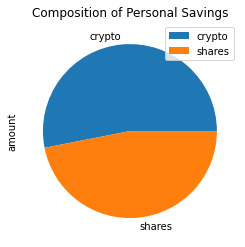

In [51]:
# Plot savings pie chart
df_savings.plot.pie(title = 'Composition of Personal Savings', y='amount')

In [52]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reach your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-22', tz='America/New_York').isoformat()

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-07-24 04:00:00+00:00  109.84  109.9200  109.7600  109.82  1946019   
2017-07-25 04:00:00+00:00  109.60  109.6300  109.3900  109.43  2601670   
2017-07-26 04:00:00+00:00  109.37  109.7100  109.3500  109.64  2249859   
2017-07-27 04:00:00+00:00  109.53  109.5868  109.4301  109.48  1868732   
2017-07-28 04:00:00+00:00  109.54  109.7000  109.4900  109.70  1894332   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-07-24 04:00:00+00:00        8331  109.819620  246.81  246.98  246.28   
2017-07-25 04:00:00+00:00       10398  109.469817  247.70  247.80  247.16   
2017-07-26 04:00:00+00:00        9293  109.531251  247.78  247.79  247.13   
2017-07-27 04:00:00+00:00        8993  109.501792  247.96  248.00  245.68   
2017-07-28 04:00:00+00:00        8841  109.624742  246.70  247.06  246.13   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-07-24 04:00:00+00:00  246.82  46622256      133710  246.695247  
2017-07-25 04:00:00+00:00  247.42  54915591      166523  247.365001  
2017-07-26 04:00:00+00:00  247.43  47575422      155730  247.488592  
2017-07-27 04:00:00+00:00  247.20  70766568      255387  246.926137  
2017-07-28 04:00:00+00:00  246.91  50088359      168056  246.714676

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [39]:
# Printing the simulation input data
MC_30y.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-07-24 04:00:00+00:00  109.84  109.9200  109.7600  109.82  1946019   
2017-07-25 04:00:00+00:00  109.60  109.6300  109.3900  109.43  2601670   
2017-07-26 04:00:00+00:00  109.37  109.7100  109.3500  109.64  2249859   
2017-07-27 04:00:00+00:00  109.53  109.5868  109.4301  109.48  1868732   
2017-07-28 04:00:00+00:00  109.54  109.7000  109.4900  109.70  1894332   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-24 04:00:00+00:00        8331  109.819620          NaN  246.81   
2017-07-25 04:00:00+00:00       10398  109.469817    -0.003551  247.70   
2017-07-26 04:00:00+00:00        9293  109.531251     0.001919  247.78   
2017-07-27 04:00:00+00:00        8993  109.501792    -0.001459  247.96   
2017-07-28 04:00:00+00:00        8841  109.624742     0.002009  246.70   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-07-24 04:00:00+00:00  246.98  246.28  246.82  46622256      133710   
2017-07-25 04:00:00+00:00  247.80  247.16  247.42  54915591      166523   
2017-07-26 04:00:00+00:00  247.79  247.13  247.43  47575422      155730   
2017-07-27 04:00:00+00:00  248.00  245.68  247.20  70766568      255387   
2017-07-28 04:00:00+00:00  247.06  246.13  246.91  50088359      168056   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-24 04:00:00+00:00  246.695247          NaN  
2017-07-25 04:00:00+00:00  247.365001     0.002431  
2017-07-26 04:00:00+00:00  247.488592     0.000040  
2017-07-27 04:00:00+00:00  246.926137    -0.000930  
2017-07-28 04:00:00+00:00  246.714676    -0.001173

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ha D T Nguyen\Desktop\USYD-VIRT-FIN-PT-06-2022-U-LOLC\Instructions-Module5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997857,1.008906,0.993881,1.009711,0.980742,1.006528,1.011526,0.999076,1.009067,0.991257,...,1.005914,1.011624,1.000417,0.996776,1.010144,1.003993,0.996912,1.001576,0.983353,1.015323
2,1.002417,1.008038,0.994674,0.997462,0.983236,1.010224,1.011941,1.015656,1.023234,0.991576,...,1.008947,1.012416,0.999399,1.011623,1.012978,0.996375,0.993053,1.002951,0.989954,1.006765
3,1.001763,1.016767,0.986869,0.997557,0.994224,1.023358,0.997002,1.038235,1.023865,0.993465,...,1.007473,1.018683,1.006770,1.005429,1.014756,1.003750,1.000054,1.011013,0.994478,0.999269
4,1.010391,1.019675,0.998354,0.985716,1.002533,1.028777,0.990902,1.035524,1.019951,0.994152,...,1.014198,1.026382,1.013445,1.008298,1.022608,1.002378,1.012545,0.995089,0.984362,1.005758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.867198,2.016450,7.525184,5.638473,2.217099,4.029679,5.127724,12.739093,4.553496,6.284012,...,6.057584,8.934243,27.615262,12.333814,1.284395,9.119239,12.978077,2.211724,7.466588,1.926505
7557,8.981988,2.011029,7.514987,5.641604,2.236817,4.028653,5.141723,12.892137,4.555245,6.258098,...,6.010403,8.873143,27.209329,12.102437,1.274382,8.986837,13.062373,2.216502,7.423994,1.952612
7558,8.953604,2.019153,7.528831,5.648522,2.255328,4.049689,5.107237,12.830183,4.522965,6.232395,...,5.984598,8.880548,27.079244,12.182291,1.271866,9.011732,13.173441,2.219610,7.463118,1.956023
7559,8.848530,1.993590,7.389372,5.592004,2.247302,4.026784,5.098935,12.777098,4.536904,6.220639,...,5.979169,8.744879,27.155157,12.193683,1.264027,9.084039,13.171803,2.205466,7.452909,1.955178


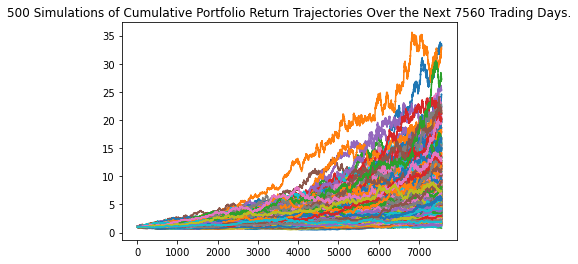

In [41]:
# Plot simulation outcomes
line_plot = MC_30y.plot_simulation()

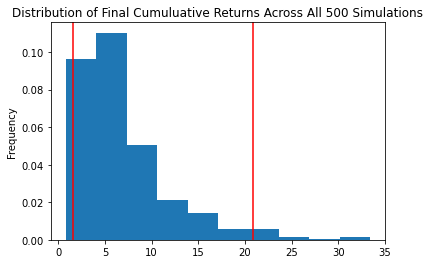

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30y.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30y.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.824804
std               4.893662
min               0.799142
25%               3.614629
50%               5.335117
75%               8.307632
max              33.430648
95% CI Lower      1.555722
95% CI Upper     20.876807
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $31114.44 and $417536.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
increased_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
updated_ci_lower = round(tbl[8]*increased_initial_investment,2)
updated_ci_upper = round(tbl[9]*increased_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${increased_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${updated_ci_lower} and ${updated_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $46671.66 and $626304.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#In this case, the weight for stock will be the same, but the initial investment will be increase to $60,000
MC_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_5y.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-07-24 04:00:00+00:00  109.84  109.9200  109.7600  109.82  1946019   
2017-07-25 04:00:00+00:00  109.60  109.6300  109.3900  109.43  2601670   
2017-07-26 04:00:00+00:00  109.37  109.7100  109.3500  109.64  2249859   
2017-07-27 04:00:00+00:00  109.53  109.5868  109.4301  109.48  1868732   
2017-07-28 04:00:00+00:00  109.54  109.7000  109.4900  109.70  1894332   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-24 04:00:00+00:00        8331  109.819620          NaN  246.81   
2017-07-25 04:00:00+00:00       10398  109.469817    -0.003551  247.70   
2017-07-26 04:00:00+00:00        9293  109.531251     0.001919  247.78   
2017-07-27 04:00:00+00:00        8993  109.501792    -0.001459  247.96   
2017-07-28 04:00:00+00:00        8841  109.624742     0.002009  246.70   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-07-24 04:00:00+00:00  246.98  246.28  246.82  46622256      133710   
2017-07-25 04:00:00+00:00  247.80  247.16  247.42  54915591      166523   
2017-07-26 04:00:00+00:00  247.79  247.13  247.43  47575422      155730   
2017-07-27 04:00:00+00:00  248.00  245.68  247.20  70766568      255387   
2017-07-28 04:00:00+00:00  247.06  246.13  246.91  50088359      168056   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-24 04:00:00+00:00  246.695247          NaN  
2017-07-25 04:00:00+00:00  247.365001     0.002431  
2017-07-26 04:00:00+00:00  247.488592     0.000040  
2017-07-27 04:00:00+00:00  246.926137    -0.000930  
2017-07-28 04:00:00+00:00  246.714676    -0.001173

In [63]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ha D T Nguyen\Desktop\USYD-VIRT-FIN-PT-06-2022-U-LOLC\Instructions-Module5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993019,1.006293,1.004919,1.018763,0.997197,0.993291,1.000860,0.995067,1.000465,0.998488,...,0.999546,0.993453,1.000759,1.004224,0.992708,0.987711,0.990050,1.001330,0.993429,0.995524
2,0.996836,1.012975,1.014162,1.008190,1.000781,0.992052,0.997047,0.996777,1.004287,1.000805,...,0.994278,0.999951,1.009408,1.007300,0.994445,0.995880,0.989906,0.993129,0.997159,1.004019
3,0.998202,1.001330,1.018978,1.005254,0.987224,0.995038,1.002823,1.000318,1.009849,1.002362,...,0.998213,1.008366,1.009333,1.023509,0.990494,1.001620,0.976449,0.996373,1.008458,0.993511
4,1.000702,1.002001,1.009624,1.000601,0.986472,0.987315,0.993425,1.000694,1.004282,1.007284,...,0.989750,1.009384,1.001213,1.019868,0.993722,1.003720,0.965111,0.995820,1.010059,0.987489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.828376,1.453925,1.109554,1.765037,1.493788,1.050904,1.613876,0.847105,1.117062,1.122799,...,1.183059,1.052431,1.287128,1.416826,1.613637,1.368301,0.782529,1.270221,1.403670,1.049909
1257,0.831938,1.449992,1.127706,1.786649,1.498083,1.037089,1.621749,0.840668,1.110748,1.115853,...,1.178942,1.053298,1.285034,1.399546,1.631015,1.360760,0.788229,1.259618,1.392152,1.049456
1258,0.828454,1.459476,1.122447,1.801354,1.481076,1.039241,1.631345,0.845719,1.110890,1.132365,...,1.171850,1.066684,1.290599,1.404060,1.629771,1.362577,0.780853,1.264520,1.393427,1.047192
1259,0.824731,1.448489,1.118995,1.811658,1.477996,1.039320,1.627366,0.853617,1.115683,1.132112,...,1.169346,1.062183,1.289776,1.400189,1.653187,1.361206,0.781852,1.269540,1.364635,1.050338


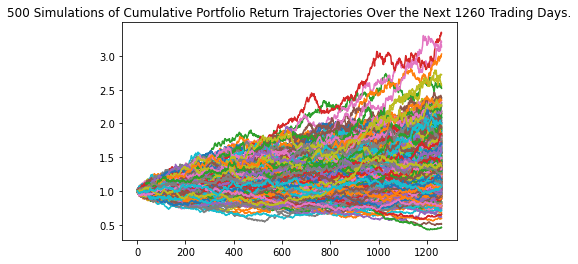

In [64]:
# Plot simulation outcomes
line_plot = MC_5y.plot_simulation()

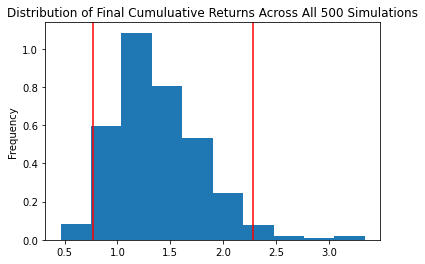

In [65]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_5y.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5y = MC_5y.summarize_cumulative_return()

# Print summary statistics
print(tbl_5y)

count           500.000000
mean              1.383481
std               0.415143
min               0.460995
25%               1.079795
50%               1.318763
75%               1.629058
max               3.340675
95% CI Lower      0.768460
95% CI Upper      2.285360
Name: 1260, dtype: float64


In [67]:
# Set initial investment
# Initial investment will be increased to $60,000
initial_investment_5y=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5Y[8]*initial_investment_5y,2)
ci_upper_five = round(tbl_5Y[9]*initial_investment_5y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5y} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46107.58 and $137121.58


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#In this case, weight of stock will be increased in the portfolio, while the initial investment will be the same of $20,000
MC_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_10y.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-07-24 04:00:00+00:00  109.84  109.9200  109.7600  109.82  1946019   
2017-07-25 04:00:00+00:00  109.60  109.6300  109.3900  109.43  2601670   
2017-07-26 04:00:00+00:00  109.37  109.7100  109.3500  109.64  2249859   
2017-07-27 04:00:00+00:00  109.53  109.5868  109.4301  109.48  1868732   
2017-07-28 04:00:00+00:00  109.54  109.7000  109.4900  109.70  1894332   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-24 04:00:00+00:00        8331  109.819620          NaN  246.81   
2017-07-25 04:00:00+00:00       10398  109.469817    -0.003551  247.70   
2017-07-26 04:00:00+00:00        9293  109.531251     0.001919  247.78   
2017-07-27 04:00:00+00:00        8993  109.501792    -0.001459  247.96   
2017-07-28 04:00:00+00:00        8841  109.624742     0.002009  246.70   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-07-24 04:00:00+00:00  246.98  246.28  246.82  46622256      133710   
2017-07-25 04:00:00+00:00  247.80  247.16  247.42  54915591      166523   
2017-07-26 04:00:00+00:00  247.79  247.13  247.43  47575422      155730   
2017-07-27 04:00:00+00:00  248.00  245.68  247.20  70766568      255387   
2017-07-28 04:00:00+00:00  247.06  246.13  246.91  50088359      168056   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-24 04:00:00+00:00  246.695247          NaN  
2017-07-25 04:00:00+00:00  247.365001     0.002431  
2017-07-26 04:00:00+00:00  247.488592     0.000040  
2017-07-27 04:00:00+00:00  246.926137    -0.000930  
2017-07-28 04:00:00+00:00  246.714676    -0.001173

In [69]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ha D T Nguyen\Desktop\USYD-VIRT-FIN-PT-06-2022-U-LOLC\Instructions-Module5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005615,1.009216,0.989481,0.981649,0.975923,0.998437,0.998078,0.998249,0.988625,0.999780,...,0.992307,0.990793,0.981711,0.988596,0.991585,1.005566,0.996043,1.000343,1.016549,0.998911
2,1.007508,0.999319,0.992122,0.981819,0.976779,0.991760,1.014032,0.976581,1.007198,0.997309,...,1.001533,0.983295,0.979413,0.968548,0.991438,1.024335,1.009365,1.004552,1.007218,0.998980
3,1.016509,1.008352,0.998059,0.991485,0.982357,0.992361,1.011762,0.972404,0.998512,0.999507,...,1.010537,0.990930,0.968241,0.938408,1.006614,1.023691,1.017823,0.991382,0.998502,1.008480
4,1.012058,0.992034,0.992539,0.988437,0.994926,0.984426,1.024314,0.979992,1.023408,0.999680,...,1.012154,0.984868,0.964514,0.931804,1.005602,1.015786,1.035488,0.989898,1.009684,1.028986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.695997,2.160568,1.214905,1.333558,1.228772,1.132721,2.145515,1.063395,0.881855,0.795776,...,1.371912,2.510161,1.475947,2.706688,0.852130,1.679815,2.766706,3.874835,2.420928,1.123967
1257,0.698286,2.157594,1.204164,1.311178,1.234754,1.122805,2.167960,1.081150,0.905063,0.790523,...,1.394902,2.512911,1.463998,2.710460,0.834042,1.705561,2.815442,3.898038,2.412560,1.135849
1258,0.708833,2.153242,1.229217,1.321608,1.236660,1.114561,2.193969,1.090523,0.896786,0.795157,...,1.398558,2.483793,1.454894,2.742687,0.829939,1.688599,2.841757,3.889339,2.384871,1.146362
1259,0.715966,2.208627,1.202981,1.319721,1.242144,1.126606,2.211644,1.090443,0.895556,0.798370,...,1.408318,2.470805,1.457805,2.766423,0.826674,1.695418,2.854527,3.864529,2.349349,1.131038


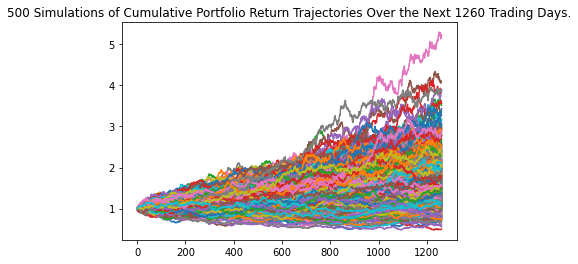

In [70]:
# Plot simulation outcomes
line_plot = MC_10y.plot_simulation()

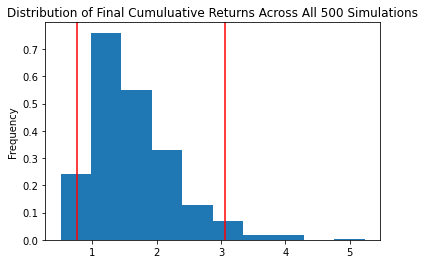

In [71]:
# Plot probability distribution and confidence intervals
dist_plot_10y = MC_10y.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10y = MC_10y.summarize_cumulative_return()

# Print summary statistics
print(tbl_10y)

count           500.000000
mean              1.611484
std               0.629007
min               0.502766
25%               1.165151
50%               1.490445
75%               1.968568
max               5.237228
95% CI Lower      0.756728
95% CI Upper      3.056275
Name: 1260, dtype: float64


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl_5Y[8]*initial_investment,2)
ci_upper_ten = round(tbl_5Y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $15369.19 and $45707.19
